<a href="https://colab.research.google.com/github/fsona/covidoutbreak/blob/master/Covid_trend_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import pandas for handling data frames
import pandas as pd
# import matplotlib as plt
import matplotlib.pyplot as plt

In [0]:
# Read data per province from Github repository of Protezione Civile
df=pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province.csv",sep=',')

In [0]:
# Clean up dataset 
# take out wrong data
df=df[df.denominazione_provincia.str.contains('In fase di definizione/aggiornamento')==False]
# transform timestamp into datetime
df['data']=pd.to_datetime(df['data'])

In [0]:
# Create supprot for subdataset extraction
# define a string with the target region I want the data per province plotted , can be any of the unique "denominazione_regione'
regtarget='Lombardia'
# extract (and show) the unique list of provinces in the target region
provincie=df[df.denominazione_regione.str.contains(regtarget)].denominazione_provincia.unique()

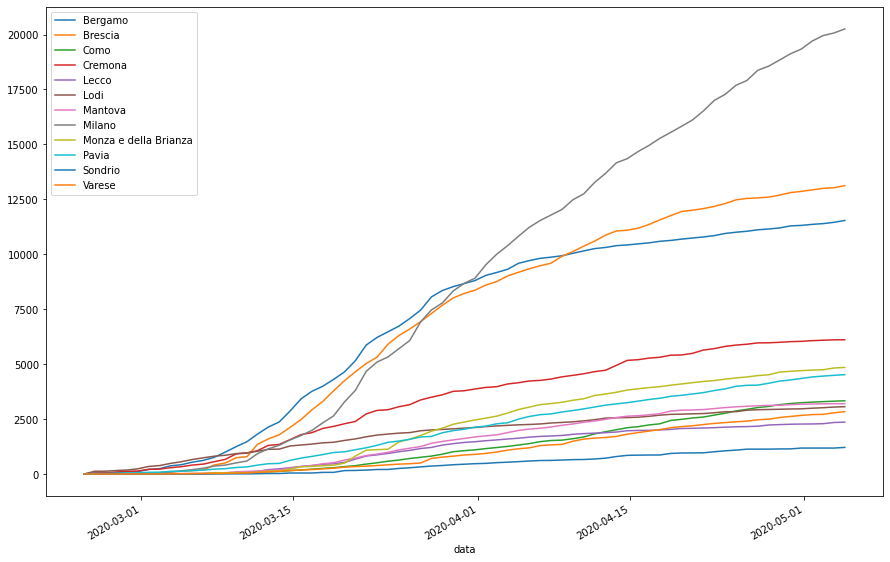

In [18]:
# create the figure for multiple subplot
fig = plt.figure()
ax = fig.add_subplot(111)
#loop to plot all the dataset on the same graph 
for elem in provincie:
    df2=df[df.denominazione_provincia.str.contains(elem)] 
    df2.plot(kind='line', x='data', y='totale_casi',ax=ax,figsize=(15,10),label=elem)